In [ ]:
!pip install GUROBI

In [57]:
!git clone https://github.com/jsebastianquiroga/tesis_mapeo_distribucion

"git" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [58]:
import os
os.chdir('tesis_mapeo_distribucion/Final')

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'tesis_mapeo_distribucion/Final'

In [59]:
# !pip install gurobipy 

In [60]:
# !pip install umap

In [61]:
from frontera_v3 import Frontera

# Rob

In [62]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio

In [63]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [64]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )


In [65]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

In [66]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [67]:
frontera.get_frontier()

In [68]:
frontera.Frontier_Point_A_X

{'FrontPoints:(0,X)': array([[ 0.62227617,  2.92883603],
        [ 0.37761614,  3.18789034],
        [ 0.1631238 ,  2.57750473],
        [ 0.46546494,  3.12315514],
        [ 1.25671178,  3.31066372],
        [ 3.2460247 ,  2.84942165],
        [ 0.93698726,  3.13569383],
        [ 0.28843247,  3.08970992],
        [ 0.21212615,  2.86599585],
        [ 0.16290582,  2.837363  ],
        [ 3.28018678,  3.2437715 ],
        [ 2.34080193,  3.61433814],
        [ 2.102906  ,  3.22385582],
        [ 0.2506727 ,  2.92042337],
        [ 0.62283833,  2.68731314],
        [ 1.28933778,  3.44969159],
        [ 1.35269561,  3.20438654],
        [ 0.70853654,  3.175776  ],
        [ 1.25078644,  3.41287224],
        [-0.00924066,  2.83195232],
        [ 1.37227679,  3.21072582],
        [ 1.83310069,  3.65276173],
        [ 2.85942078,  2.95602827],
        [-0.07228289,  2.88376939],
        [ 1.37861172,  3.61897724],
        [ 1.84070628,  3.56162231],
        [-0.02394527,  2.75901623],
       

In [69]:
frontera.plot_frontera_2D(0,1)

AttributeError: 'NoneType' object has no attribute 'items'

In [70]:
frontera.plot_Vectors(0,1)

# Leo

In [71]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=10, N_points_frontera=41, method='prototypes')

In [72]:
frontera.frontier()

Restricted license - for non-production use only - expires 2024-10-28


In [73]:
frontera.plot_frontera_2D(0,1)

AttributeError: 'NoneType' object has no attribute 'items'

# LSH

In [74]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41, method='LSH')

In [75]:
frontera.frontier()

In [76]:
frontera.centroids

{'Centroid Group: 0': array([-0.05463385,  4.08082604]),
 'Centroid Group: 2': array([-0.34792727,  3.38235838]),
 'Centroid Group: 3': array([-0.10543828,  1.65830337]),
 'Centroid Group: 4': array([1.02960497, 3.33834558]),
 'Centroid Group: 5': array([1.861506  , 2.00807671]),
 'Centroid Group: 7': array([1.05479598, 1.30950696])}

In [77]:
frontera.plot_frontera_2D(0,1)

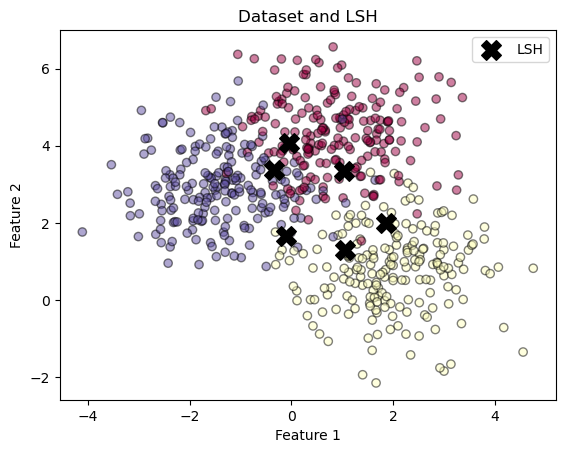

In [78]:
import numpy as np
centroid_arrays = np.array(list(frontera.centroids.values()))

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(centroid_arrays[:, 0], centroid_arrays[:, 1], c='black', marker='X', s=200, label='LSH')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and LSH')

# Show the plot
plt.show()


# MNIST

In [79]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0])[0]
y_train_col = y_train_col.reshape(-1, 1) 
# y_test_col = y_test.reshape(1, y_test.shape[0])

#train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))

In [98]:
x_train_flat = x_train_flat[0:5000,:]
y_train_col = y_train_col[0:5000,:]

In [84]:
frontera = Frontera(x_train_flat,y_train_col.T,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [100]:
x_train_flat.shape

(5000, 784)

In [86]:
x_train_flat.shape

(5000, 784)

In [87]:
y_train_col.shape

(5000, 1)

In [88]:
y_train_col[11]

array([5], dtype=uint8)

In [89]:
x_train_flat[np.where(y_train_col == 5)[0]].shape

(434, 784)

In [90]:
y_train_col == 5

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [91]:
x_train_flat.shape

(5000, 784)

In [92]:
x_train_flat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [101]:
y_train_col

array([[5],
       [0],
       [4],
       ...,
       [2],
       [1],
       [2]], dtype=uint8)

In [96]:
np.where(y_train_col[0] == 5)

(array([0], dtype=int64),)

In [102]:
frontera.frontier()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5000 but corresponding boolean dimension is 1

In [ ]:
!pip uninstall umap

In [ ]:
pip install umap-learn

In [ ]:
import umap.umap_ as umap

# Create UMAP instance and fit the model
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(x_train)

### prototypes

In [ ]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()